<a href="https://colab.research.google.com/github/mschuessler/dba_lecture/blob/main/notebooks/DBA2_03_Data_Wrangling_and_StatTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

The Titanic dataset only had a few issues we needed to fix. To show you some typical issues that may need addressing, we will work with an additional dataset in this notebook: the answers you provided to the entry questionnaire for this class.

**Note:** This time, we are importing pandas with an alias. So, instead of calling pandas directly, we will use the alias `pd`. This is not required but makes the code shorter and easier to write.

In [318]:
import pandas as pd

We will use different data this time. This data was gathered using the survey tool Qualtrics. We can download this data at a url, which we are going to save in a variable to we do not have to type it repeately.

In [319]:
q_url = "https://raw.githubusercontent.com/mschuessler/dba_lecture/refs/heads/main/data/dba_q2.csv"

# Reading Messy CSV Files
I am calling the dataset `answ`, short for answers. [Unfortunately, Qualtrics does not export well-formatted CSV files](https://community.qualtrics.com/survey-platform-before-march-2021-56/export-to-csv-without-extra-header-rows-9491). Have a look at [dba_q2.csv](https://raw.githubusercontent.com/mschuessler/dba_lecture/refs/heads/main/data/dba_q2.csv) yourself:  
The file contains three column headers instead of one:

- **Line 1:** Contains the question label, which is a very suitable column name.  
- **Lines 2–8:** Contain either metadata labels or the question that participants answered in plain text. This extends over several lines because one of the questions included spans multiple rows.  
- **Line 9:** Contains the internal metadata for each question. We are not at all interested in this.

Reading this file normally will result in either errors or strange data. We can see that we get a row (Row 0) that contains the names of the columns again, followed by a row that contains the metadata.

In [320]:
answ = pd.read_csv(q_url)

Now, one thing you might be thinking: "Let's just delete these rows and we are good to go."  
Let's try that and see what the issue with this approach might be.

I am using the `loc` attribute here, which allows you to select rows by their row number. Again, we are starting to count at 0. The code reads like this:  
Read "dba_q2.csv" and then select rows starting from 3 (zero-based: `2`) up to the end (`:`).

In [321]:
answ.loc[2:]

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,age,python_knowlege,r_knowlege,preference_rating,tools,tools_12_TEXT,OS,OS_4_TEXT,distance_to_home,Comments
2,2024-10-14 22:39:07,2024-10-14 22:41:46,0,149.224.192.178,100,158,1,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,NaN,...,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,NaN,NaN,190.49,NaN
3,2024-10-15 16:56:26,2024-10-15 16:58:01,0,217.111.77.10,100,94,1,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,NaN,...,32,2,1,-2,"1,2,3,5,8,9,11",NaN,1,NaN,9471.28,NaN
4,2024-10-15 16:55:27,2024-10-15 16:58:40,0,217.111.77.10,100,193,1,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,NaN,...,30,0,0,-2,"3,5",NaN,2,NaN,NaN,NaN
5,2024-10-15 16:57:58,2024-10-15 16:58:47,0,176.4.224.163,100,48,1,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,NaN,...,35,4,0,-2,"2,3,5",NaN,3,NaN,3758,NaN
6,2024-10-15 16:57:57,2024-10-15 16:59:04,0,85.48.186.87,100,67,1,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,NaN,...,23,2,0,-2,"2,3,5",NaN,1,NaN,1730.83,NaN
7,2024-10-15 16:55:36,2024-10-15 16:59:49,0,217.111.77.10,100,252,1,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,NaN,...,27,1,0,-2,"2,3,5,8,9",NaN,1,NaN,7376,NaN
8,2024-10-15 16:58:25,2024-10-15 17:00:27,0,217.111.77.10,100,122,1,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,NaN,...,21,3,0,0,"2,3,4,5,9,10",NaN,1,NaN,10897,NaN
9,2024-10-15 16:55:55,2024-10-15 17:00:30,0,217.111.77.10,100,274,1,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,NaN,...,34,1,0,-2,"2,3",NaN,1,NaN,8254.4,NaN
10,2024-10-15 16:55:44,2024-10-15 17:01:05,0,109.42.113.90,100,320,1,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,NaN,...,26,1,0,-2,"2,3",NaN,1,NaN,0,NaN
11,2024-10-15 16:58:47,2024-10-15 17:01:07,0,217.111.77.10,100,139,1,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,NaN,...,25,2,0,-2,"2,3,5,8,9,10",NaN,1,NaN,13761.52,NaN


While the table looks fine now and we got rid of the unnecessary data, the problem we face is that pandas tries to guess the correct data type for each column upon reading the file.  

Because the file initially contained strange character sequences, pandas likely did not detect any numbers. Instead, it assigned every column to the string data type (`dtype: object`). This would mean we would need to manually convert every column containing numbers—a tedious process.

In [322]:
answ

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,age,python_knowlege,r_knowlege,preference_rating,tools,tools_12_TEXT,OS,OS_4_TEXT,distance_to_home,Comments
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Please enter your age in years. (If you don`t ...,How knowledgeable are you about the Python pro...,How knowledgeable are you about the R programm...,Which programming language do you think this c...,Which programming language / data analysis too...,Which programming language / data analysis too...,Which operating system do you use? - Selected ...,Which operating system do you use? - Other (pl...,Please open the following website to calculate...,If you have any comments or requests for conte...
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID3_TEXT""}","{""ImportId"":""QID5""}","{""ImportId"":""QID6""}","{""ImportId"":""QID11""}","{""ImportId"":""QID7""}","{""ImportId"":""QID7_12_TEXT""}","{""ImportId"":""QID13""}","{""ImportId"":""QID13_4_TEXT""}","{""ImportId"":""QID10_TEXT""}","{""ImportId"":""QID12_TEXT""}"
2,2024-10-14 22:39:07,2024-10-14 22:41:46,0,149.224.192.178,100,158,1,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,NaN,...,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,NaN,NaN,190.49,NaN
3,2024-10-15 16:56:26,2024-10-15 16:58:01,0,217.111.77.10,100,94,1,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,NaN,...,32,2,1,-2,"1,2,3,5,8,9,11",NaN,1,NaN,9471.28,NaN
4,2024-10-15 16:55:27,2024-10-15 16:58:40,0,217.111.77.10,100,193,1,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,NaN,...,30,0,0,-2,"3,5",NaN,2,NaN,NaN,NaN
5,2024-10-15 16:57:58,2024-10-15 16:58:47,0,176.4.224.163,100,48,1,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,NaN,...,35,4,0,-2,"2,3,5",NaN,3,NaN,3758,NaN
6,2024-10-15 16:57:57,2024-10-15 16:59:04,0,85.48.186.87,100,67,1,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,NaN,...,23,2,0,-2,"2,3,5",NaN,1,NaN,1730.83,NaN
7,2024-10-15 16:55:36,2024-10-15 16:59:49,0,217.111.77.10,100,252,1,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,NaN,...,27,1,0,-2,"2,3,5,8,9",NaN,1,NaN,7376,NaN
8,2024-10-15 16:58:25,2024-10-15 17:00:27,0,217.111.77.10,100,122,1,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,NaN,...,21,3,0,0,"2,3,4,5,9,10",NaN,1,NaN,10897,NaN
9,2024-10-15 16:55:55,2024-10-15 17:00:30,0,217.111.77.10,100,274,1,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,NaN,...,34,1,0,-2,"2,3",NaN,1,NaN,8254.4,NaN


In [323]:
pd.read_csv(q_url).loc[2:].dtypes

,0
StartDate,object
EndDate,object
Status,object
IPAddress,object
Progress,object
Duration (in seconds),object
Finished,object
RecordedDate,object
ResponseId,object
RecipientLastName,object


The better way to handle this is to ignore the lines containing unwanted information as we read the file, _before_ pandas attempts to guess the data types.  

This typically involves some trial and error. You adjust the number of rows to skip until the resulting dataframe looks as expected. For example, we know that 13 people answered the questionnaire, so we can adjust the number until we see exactly 13 responses in the table—no more, no less, and without any strange entries.

In [324]:
answ = pd.read_csv(q_url, skiprows=[1, 2])
answ

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,age,python_knowlege,r_knowlege,preference_rating,tools,tools_12_TEXT,OS,OS_4_TEXT,distance_to_home,Comments
0,2024-10-14 22:39:07,2024-10-14 22:41:46,0,149.224.192.178,100,158,1,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,NaN,...,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,NaN,NaN,190.49,NaN
1,2024-10-15 16:56:26,2024-10-15 16:58:01,0,217.111.77.10,100,94,1,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,NaN,...,32,2,1,-2,"1,2,3,5,8,9,11",NaN,1.0,NaN,9471.28,NaN
2,2024-10-15 16:55:27,2024-10-15 16:58:40,0,217.111.77.10,100,193,1,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,NaN,...,30,0,0,-2,"3,5",NaN,2.0,NaN,NaN,NaN
3,2024-10-15 16:57:58,2024-10-15 16:58:47,0,176.4.224.163,100,48,1,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,NaN,...,35,4,0,-2,"2,3,5",NaN,3.0,NaN,3758.00,NaN
4,2024-10-15 16:57:57,2024-10-15 16:59:04,0,85.48.186.87,100,67,1,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,NaN,...,23,2,0,-2,"2,3,5",NaN,1.0,NaN,1730.83,NaN
5,2024-10-15 16:55:36,2024-10-15 16:59:49,0,217.111.77.10,100,252,1,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,NaN,...,27,1,0,-2,"2,3,5,8,9",NaN,1.0,NaN,7376.00,NaN
6,2024-10-15 16:58:25,2024-10-15 17:00:27,0,217.111.77.10,100,122,1,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,NaN,...,21,3,0,0,"2,3,4,5,9,10",NaN,1.0,NaN,10897.00,NaN
7,2024-10-15 16:55:55,2024-10-15 17:00:30,0,217.111.77.10,100,274,1,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,NaN,...,34,1,0,-2,"2,3",NaN,1.0,NaN,8254.40,NaN
8,2024-10-15 16:55:44,2024-10-15 17:01:05,0,109.42.113.90,100,320,1,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,NaN,...,26,1,0,-2,"2,3",NaN,1.0,NaN,0.00,NaN
9,2024-10-15 16:58:47,2024-10-15 17:01:07,0,217.111.77.10,100,139,1,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,NaN,...,25,2,0,-2,"2,3,5,8,9,10",NaN,1.0,NaN,13761.52,NaN


We can check the data types again, and now we see that there are indeed columns that pandas recognized as numeric, as they contain only numbers. This is much better.

In [325]:
answ.dtypes

,0
StartDate,object
EndDate,object
Status,int64
IPAddress,object
Progress,int64
Duration (in seconds),int64
Finished,int64
RecordedDate,object
ResponseId,object
RecipientLastName,float64


Before we move on, I want to make you aware of some additional options that you may find useful when reading CSV files. I also strongly recommend [checking the pandas documentation for this function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).  

Additionally, if you explain the issues you are having with your data and include a snippet of the CSV file, ChatGPT usually makes good suggestions on how you can fix them. However, always double-check the results and use your common sense to verify that the data looks as expected.

Here are some useful parameters for `read_csv`:

- **`encoding`**: Default is `UTF-8`. Specify another character set (e.g., `latin1`, `iso-8859-15`, `cp1252`).
- **`sep`**: Default is `","`. Define a different column delimiter (e.g., `";"`).
- **`decimal`**: Default is `"."`. Specify another decimal indicator (e.g., `","`).
- **`quotechar`**: Default is `'"'`. Define a different character for quoted fields (e.g., `"'"`).
- **`names`**: Default is `None`. Provide a list of column names for files without headers.
- **`skip_blank_lines`**: Default is `True`. Skip empty lines automatically.
- **`skiprows`**: Default is `None`. Specify a list of line numbers to ignore (only non-empty lines are counted if `skip_blank_lines` is `True`).
- **`usecols`**: Default is `None`. Define the columns to be read; all others will be ignored.
- **`parse_dates`**: Default is `False`. List columns to be read as dates. Use `date_format` to specify how dates are parsed.
- **`dtype`**: Default is inferred. Define data types for each column.

In this example, we only needed to set the `skiprows` option because all the other defaults were suitable for our file. We can demonstrate this by explicitly setting these options, which results in the same outcome.

In [326]:
answ = pd.read_csv(
    q_url,
    encoding='utf-8',         # Default encoding
    sep=',',                  # Default separator
    decimal='.',              # Default decimal indicator
    quotechar='"',            # Default quote character
    names=None,               # Default column names
    skip_blank_lines=True,    # Default behavior to skip empty lines
    skiprows=[1, 2],          # Ignore specific lines by their number
    usecols=None,             # Default to read all columns
    parse_dates=False,        # Default to not parse dates
    date_format=None,         # Default to automatic parsing when parse_dates is True
    dtype=None                # Default to infer data types
)

answ

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,age,python_knowlege,r_knowlege,preference_rating,tools,tools_12_TEXT,OS,OS_4_TEXT,distance_to_home,Comments
0,2024-10-14 22:39:07,2024-10-14 22:41:46,0,149.224.192.178,100,158,1,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,NaN,...,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,NaN,NaN,190.49,NaN
1,2024-10-15 16:56:26,2024-10-15 16:58:01,0,217.111.77.10,100,94,1,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,NaN,...,32,2,1,-2,"1,2,3,5,8,9,11",NaN,1.0,NaN,9471.28,NaN
2,2024-10-15 16:55:27,2024-10-15 16:58:40,0,217.111.77.10,100,193,1,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,NaN,...,30,0,0,-2,"3,5",NaN,2.0,NaN,NaN,NaN
3,2024-10-15 16:57:58,2024-10-15 16:58:47,0,176.4.224.163,100,48,1,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,NaN,...,35,4,0,-2,"2,3,5",NaN,3.0,NaN,3758.00,NaN
4,2024-10-15 16:57:57,2024-10-15 16:59:04,0,85.48.186.87,100,67,1,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,NaN,...,23,2,0,-2,"2,3,5",NaN,1.0,NaN,1730.83,NaN
5,2024-10-15 16:55:36,2024-10-15 16:59:49,0,217.111.77.10,100,252,1,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,NaN,...,27,1,0,-2,"2,3,5,8,9",NaN,1.0,NaN,7376.00,NaN
6,2024-10-15 16:58:25,2024-10-15 17:00:27,0,217.111.77.10,100,122,1,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,NaN,...,21,3,0,0,"2,3,4,5,9,10",NaN,1.0,NaN,10897.00,NaN
7,2024-10-15 16:55:55,2024-10-15 17:00:30,0,217.111.77.10,100,274,1,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,NaN,...,34,1,0,-2,"2,3",NaN,1.0,NaN,8254.40,NaN
8,2024-10-15 16:55:44,2024-10-15 17:01:05,0,109.42.113.90,100,320,1,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,NaN,...,26,1,0,-2,"2,3",NaN,1.0,NaN,0.00,NaN
9,2024-10-15 16:58:47,2024-10-15 17:01:07,0,217.111.77.10,100,139,1,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,NaN,...,25,2,0,-2,"2,3,5,8,9,10",NaN,1.0,NaN,13761.52,NaN


### Why These Options May Not Always Be Ideal:

1. **`usecols`**:
   - Requires the exact spelling of column names, including spaces or unusual characters.
   - Errors in column names can lead to missing or incorrect data, which may go unnoticed.

2. **`dtype`**:
   - Works only if the data can be easily converted to the specified types.
   - If data doesn't fit the specified type, it may be dropped silently, leading to data loss.
   - Casting data types after reading the file allows for easier debugging and greater flexibility, as we will demonstrate later. Pandas' default behavior of inferring types is often sufficient and robust.

3. **`parse_dates`** and **`date_format`**:
   - Only works if the dates are properly formatted and consistently structured in the source file.
   - Requires prior experience with date parsing and a clear understanding of the file's date format.
   - It's often more practical to manually cast date columns after loading the file, as we’ll explore in future examples.

# Fixing Column Names

Fixing column names is important for the following reasons:

- **Use dot notation for accessing columns**: Cleaning column names allows us to use the dot notation (e.g., `answ.column_name`) instead of bracket notation (`answ['column name']`). This makes the code cleaner and more readable.
- **Keep things consistent**: By applying transformations like stripping whitespace, converting to lowercase, and replacing spaces with underscores, column names become standardized. This consistency helps avoid confusion and errors when working with datasets from different sources.
- **Avoid worrying about spaces or capitalization**: Spaces, special characters, and inconsistent capitalization in column names can lead to hard-to-debug errors. By normalizing column names, we remove these potential pitfalls and simplify data manipulation.

### Apply your knowlege: **Harmonise Column names**:
1. Ensure that all columns are harmonically named, concretely:
    - Whitespaces are stripped from the beginning and end of column names.
    - All column names are lowercase.
    - Spaces are replaced with underscores for easier access using dot notation.
    - Parentheses are removed to eliminate special characters that could cause issues.

**Note: Build your modification query of the columns first, before you overwrite the current column names!**

In [327]:
answ.columns = answ.columns.str.strip().str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","")

In [328]:
answ

,startdate,enddate,status,ipaddress,progress,duration_in_seconds,finished,recordeddate,responseid,recipientlastname,...,age,python_knowlege,r_knowlege,preference_rating,tools,tools_12_text,os,os_4_text,distance_to_home,comments
0,2024-10-14 22:39:07,2024-10-14 22:41:46,0,149.224.192.178,100,158,1,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,NaN,...,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,NaN,NaN,190.49,NaN
1,2024-10-15 16:56:26,2024-10-15 16:58:01,0,217.111.77.10,100,94,1,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,NaN,...,32,2,1,-2,"1,2,3,5,8,9,11",NaN,1.0,NaN,9471.28,NaN
2,2024-10-15 16:55:27,2024-10-15 16:58:40,0,217.111.77.10,100,193,1,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,NaN,...,30,0,0,-2,"3,5",NaN,2.0,NaN,NaN,NaN
3,2024-10-15 16:57:58,2024-10-15 16:58:47,0,176.4.224.163,100,48,1,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,NaN,...,35,4,0,-2,"2,3,5",NaN,3.0,NaN,3758.00,NaN
4,2024-10-15 16:57:57,2024-10-15 16:59:04,0,85.48.186.87,100,67,1,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,NaN,...,23,2,0,-2,"2,3,5",NaN,1.0,NaN,1730.83,NaN
5,2024-10-15 16:55:36,2024-10-15 16:59:49,0,217.111.77.10,100,252,1,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,NaN,...,27,1,0,-2,"2,3,5,8,9",NaN,1.0,NaN,7376.00,NaN
6,2024-10-15 16:58:25,2024-10-15 17:00:27,0,217.111.77.10,100,122,1,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,NaN,...,21,3,0,0,"2,3,4,5,9,10",NaN,1.0,NaN,10897.00,NaN
7,2024-10-15 16:55:55,2024-10-15 17:00:30,0,217.111.77.10,100,274,1,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,NaN,...,34,1,0,-2,"2,3",NaN,1.0,NaN,8254.40,NaN
8,2024-10-15 16:55:44,2024-10-15 17:01:05,0,109.42.113.90,100,320,1,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,NaN,...,26,1,0,-2,"2,3",NaN,1.0,NaN,0.00,NaN
9,2024-10-15 16:58:47,2024-10-15 17:01:07,0,217.111.77.10,100,139,1,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,NaN,...,25,2,0,-2,"2,3,5,8,9,10",NaN,1.0,NaN,13761.52,NaN


In [329]:
answ.duration_in_seconds

,duration_in_seconds
0,158
1,94
2,193
3,48
4,67
5,252
6,122
7,274
8,320
9,139


# Dealing with messy columns

Our DataFrame currently contains many columns that are not relevant to our analysis. For example, the column `os_4_text` is completely empty and provides no useful information. Since it serves no purpose, we can safely remove it to simplify our dataset.

## Apply your knowlege - **Removing columns**
2. Remove the column `os_4_text` from the answ dataframe
    - Do not remove it immediately. Try the command first. Once happy with the result assign it to answ
    - Do not use `inplace`!

In [330]:
answ = answ.drop(columns="os_4_text")

In [331]:
answ

,startdate,enddate,status,ipaddress,progress,duration_in_seconds,finished,recordeddate,responseid,recipientlastname,...,education,age,python_knowlege,r_knowlege,preference_rating,tools,tools_12_text,os,distance_to_home,comments
0,2024-10-14 22:39:07,2024-10-14 22:41:46,0,149.224.192.178,100,158,1,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,NaN,...,3,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,NaN,190.49,NaN
1,2024-10-15 16:56:26,2024-10-15 16:58:01,0,217.111.77.10,100,94,1,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,NaN,...,3,32,2,1,-2,"1,2,3,5,8,9,11",NaN,1.0,9471.28,NaN
2,2024-10-15 16:55:27,2024-10-15 16:58:40,0,217.111.77.10,100,193,1,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,NaN,...,2,30,0,0,-2,"3,5",NaN,2.0,NaN,NaN
3,2024-10-15 16:57:58,2024-10-15 16:58:47,0,176.4.224.163,100,48,1,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,NaN,...,3,35,4,0,-2,"2,3,5",NaN,3.0,3758.00,NaN
4,2024-10-15 16:57:57,2024-10-15 16:59:04,0,85.48.186.87,100,67,1,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,NaN,...,2,23,2,0,-2,"2,3,5",NaN,1.0,1730.83,NaN
5,2024-10-15 16:55:36,2024-10-15 16:59:49,0,217.111.77.10,100,252,1,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,NaN,...,2,27,1,0,-2,"2,3,5,8,9",NaN,1.0,7376.00,NaN
6,2024-10-15 16:58:25,2024-10-15 17:00:27,0,217.111.77.10,100,122,1,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,NaN,...,1,21,3,0,0,"2,3,4,5,9,10",NaN,1.0,10897.00,NaN
7,2024-10-15 16:55:55,2024-10-15 17:00:30,0,217.111.77.10,100,274,1,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,NaN,...,2,34,1,0,-2,"2,3",NaN,1.0,8254.40,NaN
8,2024-10-15 16:55:44,2024-10-15 17:01:05,0,109.42.113.90,100,320,1,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,NaN,...,2,26,1,0,-2,"2,3",NaN,1.0,0.00,NaN
9,2024-10-15 16:58:47,2024-10-15 17:01:07,0,217.111.77.10,100,139,1,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,NaN,...,2,25,2,0,-2,"2,3,5,8,9,10",NaN,1.0,13761.52,NaN


## Why You Should Avoid Using `inplace`

As mentioned earlier, it's good practice to first check the result of any operation before updating your DataFrame. While many Pandas functions offer the `inplace` argument to modify the DataFrame directly. In this case it could have saved us having to save the result of the drop operation to our answ dataframe.

`answ.drop(columns=columns_to_drop, inplace=True)`
has the same result as
`answ = answ.drop(columns=columns_to_drop)`

I recommend _not to use inplace_. Here's why:

1. Write your operation in a separate cell and execute it to preview the result.
2. Check the output:
   - If **No**, adjust your code and test again.
   - If **Yes**, overwrite the DataFrame with the result explicitly.

This approach, as discussed in the previous section, minimizes errors and ensures you maintain control over your dataset. Avoiding `inplace` makes your workflow safer and easier to debug.

## Apply your knowlege - Renaming individual columns
3. Rename `recipientlastname` to `lastname` and `finished` to `completed`

In [332]:
answ = answ.rename(columns={"recipientlastname":"lastname", "finished":"completed"})

## Identifying Columns to Delete

Typically, datasets contain many columns. When working with "real" data instead of cleaned datasets, you will often find that only a fraction of the columns are relevant for your analysis. Viewing your DataFrame with unnecessary columns can overwhelm you with information that isn't useful.  

To be mindful of your cognitive resources, it is good practice to delete what you do not need, allowing you to focus on what is essential. So, how can you determine which columns are relevant?

1. Find columns that contain no information or always the same information.
2. Identify columns that contain irrelevant information.

### Finding Columns That Contain No Information

The function `nunique()`, short for "number of unique values," shows how many unique values each column has. By running this command, we can identify columns that:

- Are empty (0 unique values), e.g., `recipientfirstname`.
- Always contain the same value (1 unique value), e.g., `userlanguage`.

In [333]:
answ.nunique()

,0
startdate,13
enddate,13
status,1
ipaddress,7
progress,1
duration_in_seconds,13
completed,1
recordeddate,13
responseid,13
lastname,0


## Apply your knowlege - **Deleting Columns That Contain No Information**

4. Delete all columns which:
    - contain no information.
    - always contain the same information.


In [334]:
columns_with_no_information = answ.columns[answ.nunique() < 2]

In [335]:
answ = answ.drop(columns=columns_with_no_information)

In [336]:
answ

,startdate,enddate,ipaddress,duration_in_seconds,recordeddate,responseid,locationlatitude,locationlongitude,gender,education,age,python_knowlege,r_knowlege,preference_rating,tools,os,distance_to_home
0,2024-10-14 22:39:07,2024-10-14 22:41:46,149.224.192.178,158,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,53.6041,10.0460,0,3,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,190.49
1,2024-10-15 16:56:26,2024-10-15 16:58:01,217.111.77.10,94,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,53.5642,10.0066,0,3,32,2,1,-2,"1,2,3,5,8,9,11",1.0,9471.28
2,2024-10-15 16:55:27,2024-10-15 16:58:40,217.111.77.10,193,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,53.5642,10.0066,1,2,30,0,0,-2,"3,5",2.0,NaN
3,2024-10-15 16:57:58,2024-10-15 16:58:47,176.4.224.163,48,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,53.5742,10.0497,0,3,35,4,0,-2,"2,3,5",3.0,3758.00
4,2024-10-15 16:57:57,2024-10-15 16:59:04,85.48.186.87,67,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,40.3780,-3.7242,0,2,23,2,0,-2,"2,3,5",1.0,1730.83
5,2024-10-15 16:55:36,2024-10-15 16:59:49,217.111.77.10,252,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,53.5642,10.0066,0,2,27,1,0,-2,"2,3,5,8,9",1.0,7376.00
6,2024-10-15 16:58:25,2024-10-15 17:00:27,217.111.77.10,122,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,53.5642,10.0066,1,1,21,3,0,0,"2,3,4,5,9,10",1.0,10897.00
7,2024-10-15 16:55:55,2024-10-15 17:00:30,217.111.77.10,274,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,53.5642,10.0066,0,2,34,1,0,-2,"2,3",1.0,8254.40
8,2024-10-15 16:55:44,2024-10-15 17:01:05,109.42.113.90,320,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,53.5544,9.9960,0,2,26,1,0,-2,"2,3",1.0,0.00
9,2024-10-15 16:58:47,2024-10-15 17:01:07,217.111.77.10,139,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,53.5642,10.0066,0,2,25,2,0,-2,"2,3,5,8,9,10",1.0,13761.52


# Fixing Column Data Types
## Apply your knowlege - Identifying wrong data types
5. Examine our resulting DataFrame. For each column, consider whether the data type matches the appropriate scale type. Remember the following relationships between data types and scale types:
    - **bool**: Nominal
    - **object**: Nominal
    - **int/float**: Interval or metric

Answer:
- Wrongly formated date columns:
  - startdate
  - enddate
  - recordeddate
- Wrong Scales that should be nominal:
  - gender: Is ratio (int) but should be nominal (category or string)
  - os: Is ration (float) but should be nominal (category or string
- Potentially wrong scale, but ordinal
  - education: Is ratio but should be Ordinal (ordered category, but could also be left as int or float)
  - python_knowlege
  - r_knowlege
  - preference_rating


In [337]:
answ

,startdate,enddate,ipaddress,duration_in_seconds,recordeddate,responseid,locationlatitude,locationlongitude,gender,education,age,python_knowlege,r_knowlege,preference_rating,tools,os,distance_to_home
0,2024-10-14 22:39:07,2024-10-14 22:41:46,149.224.192.178,158,2024-10-14 22:41:47,R_8qdPqJORJBSWQHo,53.6041,10.0460,0,3,36,3,4,1,"1,2,3,5,7,8,9,10,11",NaN,190.49
1,2024-10-15 16:56:26,2024-10-15 16:58:01,217.111.77.10,94,2024-10-15 16:58:02,R_2DnWTl5Lo8jDq4W,53.5642,10.0066,0,3,32,2,1,-2,"1,2,3,5,8,9,11",1.0,9471.28
2,2024-10-15 16:55:27,2024-10-15 16:58:40,217.111.77.10,193,2024-10-15 16:58:41,R_2Ej9IoxyHxFGVho,53.5642,10.0066,1,2,30,0,0,-2,"3,5",2.0,NaN
3,2024-10-15 16:57:58,2024-10-15 16:58:47,176.4.224.163,48,2024-10-15 16:58:47,R_2nYYXJaXQhXPxqS,53.5742,10.0497,0,3,35,4,0,-2,"2,3,5",3.0,3758.00
4,2024-10-15 16:57:57,2024-10-15 16:59:04,85.48.186.87,67,2024-10-15 16:59:04,R_2x6f9Xsk6IBXebT,40.3780,-3.7242,0,2,23,2,0,-2,"2,3,5",1.0,1730.83
5,2024-10-15 16:55:36,2024-10-15 16:59:49,217.111.77.10,252,2024-10-15 16:59:49,R_2OoTI4PFgJ18YDO,53.5642,10.0066,0,2,27,1,0,-2,"2,3,5,8,9",1.0,7376.00
6,2024-10-15 16:58:25,2024-10-15 17:00:27,217.111.77.10,122,2024-10-15 17:00:28,R_2mvvwRinq7ZbeUN,53.5642,10.0066,1,1,21,3,0,0,"2,3,4,5,9,10",1.0,10897.00
7,2024-10-15 16:55:55,2024-10-15 17:00:30,217.111.77.10,274,2024-10-15 17:00:30,R_8xWd4Sk3tXkehIE,53.5642,10.0066,0,2,34,1,0,-2,"2,3",1.0,8254.40
8,2024-10-15 16:55:44,2024-10-15 17:01:05,109.42.113.90,320,2024-10-15 17:01:05,R_8RyACSLnHBp0L05,53.5544,9.9960,0,2,26,1,0,-2,"2,3",1.0,0.00
9,2024-10-15 16:58:47,2024-10-15 17:01:07,217.111.77.10,139,2024-10-15 17:01:07,R_2fdGTKLCxVh2Mcx,53.5642,10.0066,0,2,25,2,0,-2,"2,3,5,8,9,10",1.0,13761.52


# Casting to nominal/string: 4 Options

There are three ways to fix this:

1. Simple Conversion to string (Quick and easy, but has problems)
2. Simple Conversion to a categorial variable (Quick and easy, but labels might be uninformative)
3. Find numerical values and replace with string labels
4. Combine 3&4: Create labels, then convert to categorial (Recommended!)



# Option 1 - Simple String Conversion

Simple String Conversion is very straightforward. We only have to call the function `astype("str")` on the column we want to convert.

For example, in our survey dataset, the `os` column represents the operating system each participant worked with the most. Here is the mapping:


* `1.0` is `Windows`
* `2.0` is `MacOS`
* `3.0` is `Linux`
* `4.0` is `Other`


## Apply your knowlege - Simple String conversion
6. Convert the column `os` to a string using `astype("str")`.
16. Use the converted column to create a pie chart. Is the result as expected? - do you see an issue with simple string conversion?

In [338]:
answ.os.astype("str")

,os
0,nan
1,1.0
2,2.0
3,3.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


<Axes: ylabel='proportion'>

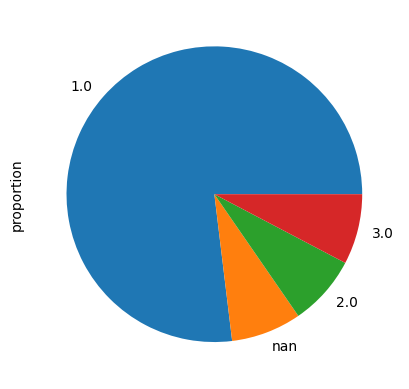

In [339]:
answ.os.astype("str").value_counts(normalize=True).plot.pie()

# Option 2 - Casting to Categorical
String is not the only datatype in Pandas suitbale for nominal data. In fact, the Pandas introduced its own datatype `pd.Categorial` to adress the issue with nominal (aka categorical) data.

## Apply your knowlege:
17. Use the function `pd.Categorial` to convert `os` to be categorial
18. Create a pie chart with the categorial data

In [340]:
pd.Categorical(answ.os)

[NaN, 1.0, 2.0, 3.0, 1.0, ..., 1.0, 1.0, 1.0, 1.0, 1.0]
Length: 13
Categories (3, float64): [1.0, 2.0, 3.0]

In [341]:
answ.os.astype("category")

,os
0,NaN
1,1.0
2,2.0
3,3.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


<Axes: ylabel='count'>

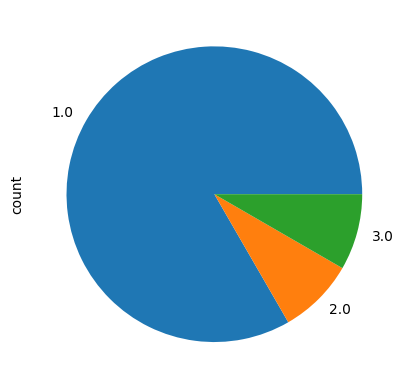

In [342]:
pd.Categorical(answ.os).value_counts().plot.pie()

# Option 3 - Replace with labelled string
A better option to simple conversion to string or categorical is to repace the number with a meaning full label, that is a string that tells us what this value represents. Recall the following mapping:
* `1.0` is `Windows`
* `2.0` is `MacOS`
* `3.0` is `Linux`
* `4.0` is `Other`

## Apply your knowlege - Replace values
8. Replace the numbers of `os` with strings that represent the operating system.
9. Create a pie chart using the fixed column. What improvements do you see?


In [343]:
answ.os.replace({1.0 : "Windows",
                 2.0 : "MacOs",
                 3.0 : "Linux",
                 4.0 : "Other"})


,os
0,NaN
1,Windows
2,MacOs
3,Linux
4,Windows
5,Windows
6,Windows
7,Windows
8,Windows
9,Windows


<Axes: ylabel='count'>

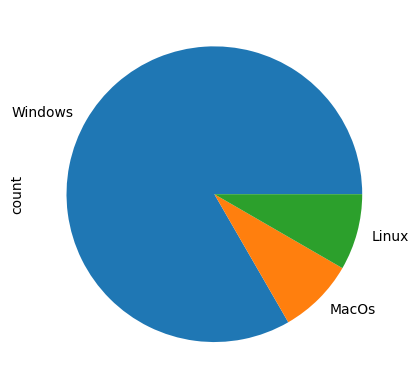

In [344]:
answ.os.replace({1.0 : "Windows",
                 2.0 : "MacOs",
                 3.0 : "Linux",
                 4.0 : "Other"}).value_counts().plot.pie()

# Option 4: Categorical with Labels
Since the column is still a string we can also convert it now to a `pd.Categorical`.
## Apply your knowlege
10. Now use the column with the replaced values to create a categorical column.
11. Create a pie chart once again.

Note: Since a categorical column does not allow any values that were not defined beforehand, undefined values will automatically be treated as missing.

In [345]:
answ.os = pd.Categorical(answ.os.replace({1.0 : "Windows",
                 2.0 : "MacOs",
                 3.0 : "Linux",
                 4.0 : "Other"}))

<Axes: ylabel='count'>

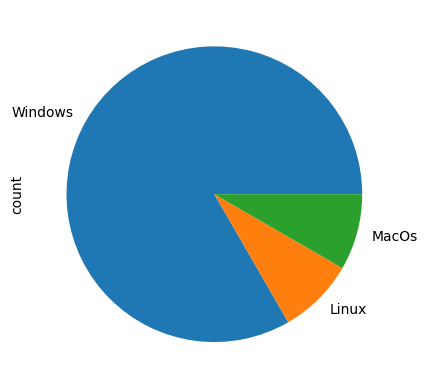

In [346]:
answ.os.value_counts().plot.pie()

In [347]:
answ.dtypes

,0
startdate,object
enddate,object
ipaddress,object
duration_in_seconds,int64
recordeddate,object
responseid,object
locationlatitude,float64
locationlongitude,float64
gender,int64
education,int64


## Apply your knowlege - **Fix sex column**
The column `sex` is also encoded incorrectly (`0` is `Male` and `1` is `Female`)

12. Convert the numerical column `gender` from int to string or categorical.
13. Create a Pie Chart with the correct labels


In [348]:
answ.gender = pd.Categorical(answ.gender.replace({0 : "Male",
                 1 : "Female"}))

<Axes: ylabel='count'>

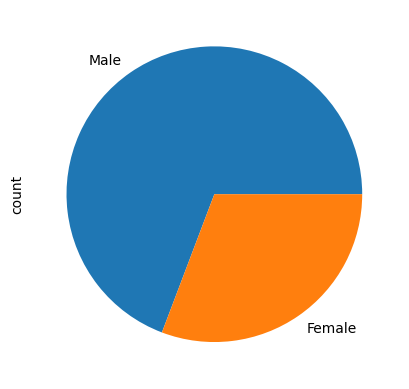

In [349]:
answ.gender.value_counts().plot.pie()

# Creating Ordinal Columns

Ordinal data is always tricky. Unlike nominal data, there is no clear best practice for handling it.  

For example, consider the education column, which is currently encoded as an integer. This presents the same issue as the gender column: the labels are numeric, and every time we look at the data, we must remember what each number represents.

To fix this, we can recode the values again, replacing numbers with strings. We can also use `Categorical` again, but this time we set the optional argument `ordered=True`.

## Important: Wrong Ordering

Pay close attention to the resulting ordered category that we get:

- `Bachelor < High School < Master`

This ordering is incorrect. The next cell will demonstrate how to fix this.

In [350]:
pd.Categorical(answ.education.replace({1: 'High School',
          2: 'Bachelor',
          3: 'Master',
          4: 'PhD'}), ordered=True, categories=['High School', 'Bachelor', 'Master','PhD'])

['Master', 'Master', 'Bachelor', 'Master', 'Bachelor', ..., 'Bachelor', 'Bachelor', 'High School', 'Master', 'Bachelor']
Length: 13
Categories (4, object): ['High School' < 'Bachelor' < 'Master' < 'PhD']

## Defining the Order of Categories

The function `Categorical` will attempt to determine the order of categories on its own if you do not specify it. By default, it will sort all unique values. Since the values are strings after recoding, they will be ordered alphabetically.

It took me a while to find a best practice for recoding values and converting them into an ordered categorical with the correct order. Here is my approach:

1. Create a `recode` dictionary. This dictionary needs to have the following properties:
    - Keys and values must be listed in ascending order.
    - Every possible key-value pair must be included, even if it does not appear in the data (e.g., `PhD` in this case).
    - Keys are the values you want to replace (e.g., numbers).
    - Values are strings that provide the labels for the categories.
2. Use `replace` with the `recode` dictionary to update the column.
3. Provide the optional argument `categories` and set it to the dictionary’s values. The order of values will match the order you define in the dictionary, ensuring the correct sequence.
4. Set `ordered=True` to make the categories ordinal.

The cell below demonstrates this approach. You can adapt it to your needs for reuse.

In [351]:
recode = {1: 'High School',
          2: 'Bachelor',
          3: 'Master',
          4: 'PhD'}

recode_edu = pd.Categorical(
    answ.education.replace(recode),
    categories=recode.values(),
    ordered=True)
recode_edu

['Master', 'Master', 'Bachelor', 'Master', 'Bachelor', ..., 'Bachelor', 'Bachelor', 'High School', 'Master', 'Bachelor']
Length: 13
Categories (4, object): ['High School' < 'Bachelor' < 'Master' < 'PhD']

## Limited Numerical Functions with Ordered Categoricals

Once you have created an ordered categorical, the only mathematical functions that remain available are `min` and `max`.

In [352]:
print(f"Education Level - Min: {recode_edu.min()} Max: {recode_edu.max()}")

Education Level - Min: High School Max: Master


But this can be problematic if we need more operations. Take the columns `python_knowlege` and `r_knowlege`, for example. We can easily calculate statistics for these columns when they are numerical. By examining the quantiles, we can observe that the knowledge levels were distributed very differently. However, we still have to remember what the numbers represent.

**Note:** If you cannot interpret this output, revisit the section on descriptive statistics. You should be able to read and interpret this at this point.

In [353]:
answ[["python_knowlege", "r_knowlege"]].quantile([0, 0.25, 0.5, 0.75, 1])

,python_knowlege,r_knowlege
0.00,0.0,0.0
0.25,1.0,0.0
0.50,1.0,0.0
0.75,2.0,0.0
1.00,4.0,4.0


Now, one might think it is a good idea to recode these variables as well. I demonstrate this approach below:

In [354]:
recode = {0: 'No knowledge',
          1: 'Slightly knowledgeable',
          2: 'Moderately knowledgeable',
          3: 'Very knowledgeable',
          4: 'Extremely knowledgeable'}

python_recoded = pd.Categorical(
    answ.python_knowlege.replace(recode),
    categories=recode.values(),
    ordered=True)

r_recoded = pd.Categorical(
    answ.r_knowlege.replace(recode),
    categories=recode.values(),
    ordered=True)

However, after recoding, we can no longer calculate the median because pandas cannot compute the median from strings.  
(Honestly, this is somewhat inconvenient, but that’s the way it works.)

In [355]:
try:
    python_recoded.median()
except Exception as e:
    print(f"Caught error: {e}")

Caught error: 'Categorical' object has no attribute 'median'


The only operation still available is `value_counts()`.

In [356]:
python_recoded.value_counts()

,count
No knowledge,1
Slightly knowledgeable,6
Moderately knowledgeable,3
Very knowledgeable,2
Extremely knowledgeable,1


However, if we leave this column in it orginal format we can do a lot more, such as creating informative box plots. We would loose this if we convert this column to be an ordinal category.

<Axes: >

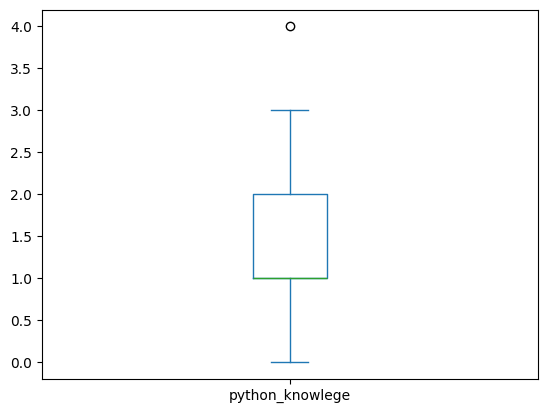

In [357]:
answ.python_knowlege.plot.box()

## Maintaining Numerical Functions

Even though it is not ideal, I recommend avoiding recoding if you want to maintain numerical functionality.  

In this example, I use numbers as category labels when converting to an ordered `Categorical`.

In [358]:
answ.r_knowlege = pd.Categorical(answ.r_knowlege,
                                 categories=[0, 1, 2, 3, 4],
                                 ordered=True)
answ.python_knowlege = pd.Categorical(answ.python_knowlege,
                                 categories=[0, 1, 2, 3, 4],
                                 ordered=True)

This approach allows me to easily convert the data back to numbers, enabling calculations such as the median.  

Note the use of the `astype(int)` command in this process.

In [359]:
answ.python_knowlege.astype("int").median()

1.0

Of course, this does not solve the issue of having to remember what each value represents.  

We can address this by recoding the output with our labels. Here, we follow the same steps as at the beginning of this section. However, since the knowledge columns are categorical, we use `astype(int)` to enable the use of the `quantiles` function.  

Finally, we apply `replace` to the output to display labels instead of numbers in the quantiles table.

In [360]:
recode = {0.0: 'No knowledge',
          1.0: 'Slightly knowledgeable',
          2.0: 'Moderately knowledgeable',
          3.0: 'Very knowledgeable',
          4.0: 'Extremely knowledgeable'}

answ[["python_knowlege", "r_knowlege"]].astype("int").quantile([0, 0.25, 0.5, 0.75, 1]).replace(recode)

,python_knowlege,r_knowlege
0.00,No knowledge,No knowledge
0.25,Slightly knowledgeable,No knowledge
0.50,Slightly knowledgeable,No knowledge
0.75,Moderately knowledgeable,No knowledge
1.00,Extremely knowledgeable,Extremely knowledgeable


# Converting to Datetime

One thing that `read_csv` does not do automatically for us is convert dates.  

That being said, there is an option to provide the optional argument `parse_dates`, where we can list the columns that should be converted. We can also use `date_format` to specify how we want the dates to be formatted.  

I leave it to you to try this out. For beginners, I recommend converting dates after reading in the CSV file. This approach makes it easier to apply trial and error and reduces the likelihood of encountering errors you do not understand.  

Converting non-exotic dates is straightforward this way.

## Apply your knowlege - Convertig to Datetime with format detection
14. Use the function `to_datetime` to convert the `startdate` column from string to datetime. Let Pandas try to guess the date format.

In [361]:
answ.startdate = pd.to_datetime(answ.startdate)
answ.startdate

,startdate
0,2024-10-14 22:39:07
1,2024-10-15 16:56:26
2,2024-10-15 16:55:27
3,2024-10-15 16:57:58
4,2024-10-15 16:57:57
5,2024-10-15 16:55:36
6,2024-10-15 16:58:25
7,2024-10-15 16:55:55
8,2024-10-15 16:55:44
9,2024-10-15 16:58:47


You can explicitly define the date format by providing the optional argument `format` in the `to_datetime` function.  

For figuring out the correct format, I recommend copying an example date and asking ChatGPT which format you should use so pandas can convert it correctly. Below, we define a format that pandas would have been able to infer automatically:

`%Y-%m-%d %H:%M:%S`:
- `%Y`: Four-digit year (e.g., 2024)
- `%m`: Two-digit month (e.g., 10)
- `%d`: Two-digit day (e.g., 15)
- `%H`: Two-digit hour in 24-hour format (e.g., 16)
- `%M`: Two-digit minute (e.g., 59)
- `%S`: Two-digit second (e.g., 04)

## Apply your knowlege - Convertig to Datetime with explicit format defenition

15. Use the function `to_datetime` to convert the `enddate` column from string to datetime. This time figure out the appropirate date format yourself and define it explicitly by setting the optional argument `format`.

In [362]:
answ.enddate = pd.to_datetime(answ.enddate, format="%Y-%m-%d %H:%M:%S")
answ.enddate

,enddate
0,2024-10-14 22:41:46
1,2024-10-15 16:58:01
2,2024-10-15 16:58:40
3,2024-10-15 16:58:47
4,2024-10-15 16:59:04
5,2024-10-15 16:59:49
6,2024-10-15 17:00:27
7,2024-10-15 17:00:30
8,2024-10-15 17:01:05
9,2024-10-15 17:01:07


But why would we even care to convert dates and times?  

Converting dates and times gives us access to time-based calculations.

## Apply your knowlege - Time-based Calculations.

16. Subtract timestamps the two timestamps from one another so you obtain a measure of how long each respondent took to complete the questionnaire.

In [363]:
duration = answ.enddate - answ.startdate
duration

,0
0,0 days 00:02:39
1,0 days 00:01:35
2,0 days 00:03:13
3,0 days 00:00:49
4,0 days 00:01:07
5,0 days 00:04:13
6,0 days 00:02:02
7,0 days 00:04:35
8,0 days 00:05:21
9,0 days 00:02:20


## Creating New Columns

The previous example was a perfect scenario for when we may want to create a new column. This process is very straightforward:  

All we need is a pandas `Series` that has the same length (number of rows) as our DataFrame. We can then create a new column as follows:

```python
df["new_column_name"] = SERIES

## Apply your knowlege - Time-based Calculations.

17. Create a new column that contains how long each respondent took to complete the questionnaire.

In [364]:
answ["duration"] = duration

## Quick Example in Class:
Change the order of columns so that duration is the first column

In [365]:
columns = ['duration',
           'responseid',
           'gender',
           'education',
           'age',
           'startdate',
           'enddate',
           'duration_in_seconds',
           'recordeddate',
           'ipaddress',
           'locationlatitude',
           'locationlongitude',
           'distance_to_home',
           'os',
           'python_knowlege',
           'r_knowlege',
           'preference_rating',
           'tools']

answ[columns]

,duration,responseid,gender,education,age,startdate,enddate,duration_in_seconds,recordeddate,ipaddress,locationlatitude,locationlongitude,distance_to_home,os,python_knowlege,r_knowlege,preference_rating,tools
0,0 days 00:02:39,R_8qdPqJORJBSWQHo,Male,3,36,2024-10-14 22:39:07,2024-10-14 22:41:46,158,2024-10-14 22:41:47,149.224.192.178,53.6041,10.0460,190.49,NaN,3,4,1,"1,2,3,5,7,8,9,10,11"
1,0 days 00:01:35,R_2DnWTl5Lo8jDq4W,Male,3,32,2024-10-15 16:56:26,2024-10-15 16:58:01,94,2024-10-15 16:58:02,217.111.77.10,53.5642,10.0066,9471.28,Windows,2,1,-2,"1,2,3,5,8,9,11"
2,0 days 00:03:13,R_2Ej9IoxyHxFGVho,Female,2,30,2024-10-15 16:55:27,2024-10-15 16:58:40,193,2024-10-15 16:58:41,217.111.77.10,53.5642,10.0066,NaN,MacOs,0,0,-2,"3,5"
3,0 days 00:00:49,R_2nYYXJaXQhXPxqS,Male,3,35,2024-10-15 16:57:58,2024-10-15 16:58:47,48,2024-10-15 16:58:47,176.4.224.163,53.5742,10.0497,3758.00,Linux,4,0,-2,"2,3,5"
4,0 days 00:01:07,R_2x6f9Xsk6IBXebT,Male,2,23,2024-10-15 16:57:57,2024-10-15 16:59:04,67,2024-10-15 16:59:04,85.48.186.87,40.3780,-3.7242,1730.83,Windows,2,0,-2,"2,3,5"
5,0 days 00:04:13,R_2OoTI4PFgJ18YDO,Male,2,27,2024-10-15 16:55:36,2024-10-15 16:59:49,252,2024-10-15 16:59:49,217.111.77.10,53.5642,10.0066,7376.00,Windows,1,0,-2,"2,3,5,8,9"
6,0 days 00:02:02,R_2mvvwRinq7ZbeUN,Female,1,21,2024-10-15 16:58:25,2024-10-15 17:00:27,122,2024-10-15 17:00:28,217.111.77.10,53.5642,10.0066,10897.00,Windows,3,0,0,"2,3,4,5,9,10"
7,0 days 00:04:35,R_8xWd4Sk3tXkehIE,Male,2,34,2024-10-15 16:55:55,2024-10-15 17:00:30,274,2024-10-15 17:00:30,217.111.77.10,53.5642,10.0066,8254.40,Windows,1,0,-2,"2,3"
8,0 days 00:05:21,R_8RyACSLnHBp0L05,Male,2,26,2024-10-15 16:55:44,2024-10-15 17:01:05,320,2024-10-15 17:01:05,109.42.113.90,53.5544,9.9960,0.00,Windows,1,0,-2,"2,3"
9,0 days 00:02:20,R_2fdGTKLCxVh2Mcx,Male,2,25,2024-10-15 16:58:47,2024-10-15 17:01:07,139,2024-10-15 17:01:07,217.111.77.10,53.5642,10.0066,13761.52,Windows,2,0,-2,"2,3,5,8,9,10"


# Casting to Numeric

Pandas generally does a good job detecting numerical columns in your dataset. However, if it fails, this may indicate the presence of unusual values or numbers stored as strings (e.g., within quotation marks).  

Before converting, it’s a good idea to identify and handle these problematic values first. Attempting to convert a column (e.g., `revenue`) to numeric will likely raise an error if pandas couldn’t already infer the type. This suggests that the conversion isn’t straightforward and requires cleaning.

Below, I create a simple example (a pandas Series) by hand to demonstrate this concept.

In [366]:
# Example data
house_numbers = pd.Series(['10', '20.5', 'thirty', '40', 'NaN', '', '50a'], name='revenue')
house_numbers

,revenue
0,10
1,20.5
2,thirty
3,40
4,NaN
5,
6,50a


## Apply your knowlege - Converting to numerical
18. Use the function `to_numeric()` to convert `house_numbers` to numerical. Inspect the error message. Describe in your own words what the issue was.
However, it raises an error because it cannot parse `"thirty"`.


Note: This behavior is typical when working with CSV files: any column that can be converted to numeric without errors will already have been converted automatically during the file read process.  

The error simply confirms that there is an issue with the data that needs to be addressed.

What many people do is simply ignore these errors and convert the data anyway.  

## Apply your knowlege
19. Use the optional argument `errors='coerce'` of the `to_numeric()` function to force pandas to convert all values it can convert. Inspect the result - what happens to the values that could not be converted. Can you think of scenarios were this might be problematic?

If you want to be diligent, you can compare the values before and after the conversion.  

In particular, you can filter for rows that were not empty before the conversion but are empty after the conversion. This helps identify problematic values that were lost during the conversion process.

In [ ]:
house_numbers[house_numbers.notna() & converted_values.isna()]

The list above shows us which values are problematic:

- **`thirty`**: Should be replaced with `30` for the conversion to work.
- **`NaN`**: Can be converted to a missing value.
- **`Empty`**: Can be converted to a missing value.
- **`50a`**: Should be replaced with `50` for the conversion to work.

This means there are only two replacements we need to make to avoid any information loss during the conversion.

## Apply your knowlege - Manually fixing values
20. Replace the values `thirty` and `50a` by numbers manually.
21. Convert the column to numerical and inpect the result


# Change of Dataset: Creditcards
For the next section we are going to use a different dataset, a list of imaginary clients and their credit card numbers.

In [ ]:
cards_url = "https://raw.githubusercontent.com/mschuessler/dba_lecture/refs/heads/main/data/customer_credit_cards.csv"
cards = pd.read_csv(cards_url)
cards

## Apply your knowlege - Find incorrect datatypes
22. Inspect the datatypes of the columns of cards. Which ones are in an incorrect format?

# Casting to Bool

If a value encodes "yes" or "no," it may be useful to cast it to a boolean type for easier counting and filtering.  

When "yes" is coded as `1` and "no" as `0`, casting to `bool` is very straightforward. This is the case for the `active` column in our dataset.

# Apply your knowlege - Direct cast to bool
23. Cast the column `active` to be boolean



## Casting string to bool


For the `premium` column, the situation is slightly different: here, `"yes"` represents `True` and `"no"` represents `False`.  

This can also be handled with ease. We simply check if `premium` is `"yes"`. The result of this comparison will be `True` for all cells that contain `"yes"` and `False` for all others.

In [ ]:
cards.premium == "yes"

## When Numbers Aren't Really Numbers

- **Default Behavior**: Columns filled exclusively with numbers are typically read as `int` or `float` by default in Pandas.

- **Why This Might Not Be Ideal**: Sometimes, numerical values don't represent quantities on an interval scale and shouldn't be treated as such. This commonly occurs with numeric identifiers, such as IDs or account numbers.

- **Examples of Numeric Identifiers**:
  - ISBN numbers
  - Credit card numbers
  - Other encoded identifiers

- **Quick Test**: Ask yourself: *If I multiply this number by 2 and then subtract 1, does it still have a valid meaning?* For identifiers, the answer is usually "no." In such cases, these values should be treated as nominal (strings or categorical), not numerical.

### Example: Credit Card Numbers
Consider a dataset with credit card information encoded as numerical. Multiplying a credit card number by 2 would result in an invalid number, confirming it’s an identifier, not a real number.

## Risks when casting to int
To fix columns that are ints but should be string, you can cast the column to a string, ensuring it is treated appropriately as an identifier rather than a numerical value.

In [ ]:
cards.credit_card_number.astype("str")

But wait—_something is not right here_.  

Why do these credit card numbers have different lengths? This issue was present even before we converted them to strings, so there must be something wrong with the file, right?  

Actually, yes, there is. Take a look at [`customer_credit_cards.csv`](https://github.com/mschuessler/dba_lecture/blob/main/data/customer_credit_cards.csv).  

The issue is that some card numbers have leading zeros. These zeros were lost when pandas read them in as numbers because leading zeros have no numerical meaning. The problem with the file is that the credit card numbers should have been escaped with quotation marks (`"`) to let pandas know they are strings.  

Since this did not happen, we can fix it by telling pandas to read this column as a string in the first place. To do this, we use the optional argument `dtype` with a dictionary specifying the column name as the key and the data type as the value.

In [ ]:
cards = pd.read_csv(cards_url,dtype={"credit_card_number": "string"})
cards

In [ ]:
cards.credit_card_number.str.len()

## Loading Titanic Dataset One More Time

Let’s bring back our passengers from the Titanic. This time, we will only read in the columns needed for the following demonstrations.  

You will also notice that I am taking a shortcut by fixing the data types that are incorrect immediately upon reading the CSV.  

**Note:** Please only use this approach once you have mastered the more manual methods of handling data types.

In [ ]:
passengers = pd.read_csv("https://raw.githubusercontent.com/mschuessler/dba_lecture/refs/heads/main/data/titanic.csv",
                         usecols=["Name","Age","Cabin","Sex","Survived"],
                         dtype={"Survived": "bool", "Sex": "category"})

# Filters and Subsets
So far, we have only been looking at one column at a time. This is useful as a first step to understand the data and should never be skipped. Once we feel confident we understand the columns we are interested in, we can move on to explore relationships using descriptive statistics. In many cases, we do this by splitting the data into subsets and then analyzing these subsets individually. This is one of the core principles of statistical analysis. There are two primary ways to compare subsets of the data:
1) Creating subsets with filters
2) Grouping datasets by a variable or criteria (this will be covered in a later section)


## Defining Filters
We can define filters by specifying a condition that selects certain rows from the dataset based on the values in one or more columns. Here we will focus on the "EQUAL" (`==`) criteria. However, there are many other criteria you may want to explore:

- **Equality** (`==`)  
- **Not equal to** (`!=`)
- **Less than** (`<`)  
- **Less than or equal to** (`<=`)  
- **Greater than** (`>`)  
- **Greater than or equal to** (`>=`)  
- **Values that are not empty or invalid** (`notna()`)  
- **Values that are empty or invalid** (`isna()`)  
- **Checking for membership** (`.isin([value1, value2, ...])`)  
- **String containment** (`str.contains('substring')`)  
- **Logical combinations** (`&` for AND, `|` for OR, `~` for NOT)

Here we simply define a filter that checks if the sex of the passenger is equal to "male". As a result we get a series that has the same lenght as the dataframe. Each cell show if the criteria has been met at that row. So
- Passenger 1 is male
- Passenger 2 is not male
- Passenger 3 is not male
- Passenger 4 is male
- ....

In [ ]:
passengers.Sex == "male"

We can safe this series of bools into a variable (here called filter) to use it to plug it into our dataframe. Once the dataframe recieves a series of True and False it know its a filter an will return only the rows for which the filter criteria is true. As a result we are shown the rows that contain only male passengers.

In [ ]:
filter = passengers.Sex == "male"
passengers[filter]

Note that you can also write the filter criteria into the the squared brackets without the need to create a filter variable. While this may be faster to type, it is harder to read. So I do not recommend it for beginners.

In [ ]:
passengers[passengers.Sex == "male"]

Overall the expression above is not that easy to read. Especially since we have to pay attention to not use double brackets and we have type passengers twice. There is a function that adresses this, were we don't need to state the obvious: We are filtering on passengers. The function is called query(). The code below produces exactly the same output as the two cells above. It is up to you how you want to filter your dataframes.

In [ ]:
passengers.query('Sex == "male"')

In case your are sruggeling with the `==` notation there is also a function that does the same thing. `eg` ist short for equal. There are eqivalent functions for other comparisions too.

In [ ]:
passengers.Sex.eq("male")

When we use a filter on a dataset to select only specific rows, we obtain a subset. We can save this subset as a variable and run descriptive statistic on it or create visualisations with it.
## Apply your knowlege - Calculations on Subsets
24. Create a subset: Filter the passengers dataset for female passengers and save this as a new dataframe
25. Compute descriptive statisitcs for the survival rate of the female passengers
26. Create a pie char showing the chanche of survival for female passengers

## Combining several filter
We can use **Logical combinations** of filters to combine criteria. Here we create an age filter and combine it (`&`) with our filter for females

In [ ]:
above_30 = passengers.Age > 30
passengers[above_30 & filter]

# Missing Values are Anoying

Missing values can be challenging because they lack inherent properties, making operations difficult. Essentially missing values have no Scale Type, so all operations we usally use dont apply to them.

Note: We need to import nan here for demonstration purposes.

In [367]:
from numpy import nan

## Missing values are not on the interval or ratio scale
If values are on the ratio scale it allows us to use **Operations**. But this does not work for missing values:  

- What is `1 + NA`? Is one plus something unknown still one?  
- What is `5 / NA`?  

In [368]:
1 + nan

nan

In [369]:
5 / nan

nan

If we don't have operations. It makes it difficult to calculate descriptive statistics.

For example: What is the mean of `3, 5, 6, 1, NA, 2`?  

The mean is calculated as the sum of all values divided by the number of values. However, since we cannot calculate the sum due to the presence of `NA`, the mean cannot be determined directly.

In [370]:
(3 + 5 + 6+ 1 + nan + 2)/6

nan

## Missing values are not on the ordinal scale
Consider the following example with missing values (`NA`):  
How should you *sort* `3, 5, 6, 1, NA, 2`?  

You can't really because we do not know if NA is bigger or smaller than any other number in this list.

Note: Pandas places `NA` at the end of the sorted list. However, SAS, a popular statistical software, places missing values at the beginning. This inconsistency can lead to unexpected results and differences between tools.

In [371]:
numbers_with_na = pd.Series([3, 5, 6, 1, nan, 2])
numbers_with_na.sort_values()

,0
3,1.0
5,2.0
0,3.0
1,5.0
2,6.0
4,NaN


## Missing values are not on the nominal scale
We can not even compare missing values if there are the same. Which means they are not even nominal.

In [372]:
x1 = nan
x2 = nan
x1 == x2

False

This creates problems when we want to filter for missing values.  

If we cannot compare missing values, how can we filter for them? For example, consider our previously created Series `numbers_with_na`, which contains a missing value. Yet, the following code does not work as expected:

# Graceful Handeling of Missing Values
Strictly speaking with missing values, we have a lot of problems
*   We cant calculate parametic statistics with them: No mean, standard deviation etc.
*   We cant sort them: No Median, Mode, Quantiles
*   We cant compare them for equality: No filters, groups, finding them

If you approach Missing values this way it is called: *strict handling of missing value*. This is the standard approach in languages such as C, Java etc.

Fortunately, pandas handles missing values gracefully. This means we have specialised functions to deal with them and most common function just ignore them.

So even though we could not calculate the mean by hand, if we use pandas mean function we still get a result.

In [374]:
numbers_with_na.mean()

np.float64(3.4)

Most operations in pandas have a `skipna` flag, which is set to `True` by default.  

Let’s see what happens when we tell pandas to be strict about missing values by setting `skipna=False`.

In [375]:
numbers_with_na.mean(skipna=False)

np.float64(nan)

Luckily, we also have two functions that address the issue of **filtering for missing values, or filtering them out**.

- `isna()`: Identifies missing values.
- `notna()`: Identifies non-missing values.

In [376]:
numbers_with_na.isna()

,0
0,False
1,False
2,False
3,False
4,True
5,False


In [377]:
numbers_with_na.notna()

,0
0,True
1,True
2,True
3,True
4,False
5,True


In [378]:
numbers_with_na.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 180.0 bytes


Pandas even provides the function `fillna` to replace missing values

In [379]:
numbers_with_na.fillna(0)

,0
0,3.0
1,5.0
2,6.0
3,1.0
4,0.0
5,2.0


# Finding Columns with Missing Values

Because pandas handles missing values gracefully, you may not have even noticed that we have been ignoring them all along.



For example, the DataFrame info shows that there are 891 passengers, but we only know the age for 714 of them. Additionally, for a very small share of 214 passengers, we know which cabin they stayed in.

In [ ]:
passengers.info()

This means that when we look at the age distribution, it represents only the 714 passengers whose age is known, not the full set of 891 passengers.

In [ ]:
passengers.Age.describe()

## Apply your knowlege - Filtering for missing values
27. Create a filter than finds all entries in the passenger dataset, were `Age` is missing.
28. Create a filter than finds all entries in the passenger dataset, were `Cabin` is missing.
29. Combine both filters to show all passengers were we have no information about their age or which cabin they traveled in
Now, let’s look at the passengers for whom we know neither the age nor the cabin they stayed in.  

This demonstrates how `isna()` and `notna()` can be very useful for filtering.

We can replace missing values, but for statistical analysis and describing the data, this is usually a bad idea.  

For example, we should not simply guess the ages of people. Instead, we should explicitly state how many individuals have unknown ages.

In [ ]:
print(f"The median age of passengers was {passengers.Age.median()}. " +
    f"But note that for {round(passengers.Age.isna().mean()*100,1)}%" +
     " of passengers, the age is unknown.")

## Apply your knowlege - Replace missing values

30. For the sake of this exercise, let’s assume we know that people who did not have a cabin were very likely to stay under deck. Replace all missing values of the column `Cabin` with the value `Under deck?`

## Apply your knowlege - Creating subsets
31. Create a subset called `only_children` that contains all passengers younger than 18
32. Create a subset called `only_female_adults` that contains all female passengers that are at least 18 years old
33. Create a subset called `only_male_adults` that contains all male passenger that are at least 18 years old
34. Calculate the chanche of survival for Children, Woman and Men

In [ ]:
surv_children = round(100*children.Survived.mean(),1)
surv_woman = round(100*woman.Survived.mean(),1)
surv_men = round(100*men.Survived.mean(),1)

print(f"Survival rates: \n"+
      f"children: {surv_children}%\n"+
      f"woman: {surv_woman}%\n"+
      f"men: {surv_men}%\n")

To be able to differentiate between the subgroups we can add a new column that shows which subgroub our subset show. We need to call the `copy` command because right now our subset are just views on the original data. The command ensures we are actually creating a copy.

In [ ]:
children = passengers[only_children].copy()
woman = passengers[only_female_adults].copy()
men = passengers[only_male_adults].copy()
children["Group"] = "Children"
woman["Group"] =  "Woman"
men["Group"] = "Men"

## Extending DataFrame Vertically

We can add more information to the end of the DataFrame using the `concat` method, short for "concatenate."  

To demonstrate this, we will create three subsets and combine them to one dataset again.Now, I can combine the subsets back together using `concat()`.

In [ ]:
grouped_passengers = pd.concat([children, woman, men])
grouped_passengers

However, you will notice that my new DataFrame is shorter than the original one.  

This is because of the filters I used. Whenever age was not defined for an entry, none of the filters selected it to be included in any of the subsets.  

This highlights one of the risks of handling data in this way: you may unintentionally exclude some data without even realizing it.

In [ ]:
print(f"Orignal data: {len(passengers)} rows\n"+
      f"Grouped data: {len(grouped_passengers)} rows")

# Grouping data

Let’s improve our approach by working directly on the original dataset. Since we are nearing the end of the lecture, let’s combine a few things we have learned.

We first create a new column that we fill with the inital value `None`.

In [ ]:
passengers["Group"] = None

We then use `.loc()` to update this column.  

The function takes two arguments:  
1. The filter criteria.  
2. The column to be updated for rows where the filter matches.  

In [ ]:
passengers.loc[only_children, "Group"] = "Children"
passengers.loc[only_female_adults, "Group"] = "Woman"
passengers.loc[only_male_adults, "Group"] = "Men"

Optional Step: We turn our column into a categorical type.  


In [ ]:
passengers.Group = pd.Categorical(passengers.Group)

This approach keeps missing values.

In [ ]:
passengers[passengers.Group.isna()]

Calculating descriptive statistics is now very easy.

In [ ]:
passengers.Survived.groupby(passengers.Group).value_counts(normalize=True)

## Extending DataFrame Horizontally

Rather than adding more rows to a DataFrame as we did in the previous section, we sometimes want to add more columns. This is typically the case when we have two or more data sources/tables that we can connect via a key.  

If you’ve used Excel before, you may be familiar with `VLOOKUP`. The pandas command [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) works similarly. For a source DataFrame, we add all the column information from another DataFrame by connecting them using a key.  

Consider the following DataFrame, which we are loading from a JSON file. It is very simple, containing an IP address and the corresponding city for each IP address.

In [ ]:
ip_city = pd.read_json("https://raw.githubusercontent.com/mschuessler/dba_lecture/refs/heads/main/data/ip_city.json")
ip_city

## Arguments of the `merge` Command

The pandas `merge` function is very powerful, and I encourage you to read the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) and explore more usage examples online. Here, I will review some of the main arguments you can use to join data that is relevant for your analysis:

- **Left DataFrame**: This is typically referred to as the primary DataFrame. It is the DataFrame to which we want to add columns. In this case, it is the answers we collected in `answ`.
- **Right DataFrame**: This is typically referred to as the secondary DataFrame. It is the DataFrame from which we want to retrieve columns to add to the primary DataFrame.
- **`right_on`**: The name of the column in the primary DataFrame that contains the key. For every row, pandas will look at this column and try to find a matching value in the secondary DataFrame.
- **`left_on`**: The name of the column in the secondary DataFrame that contains the key. For every key found in the primary DataFrame, pandas will look in this column of the secondary DataFrame to find a match.
- **`how`**: The join type. Typically, if you follow the primary-secondary logic, you want to use a Left Join:
  - **`left`**: Keep every row of the left/primary DataFrame and add all columns of the right/secondary DataFrame. If no match is found in the secondary DataFrame, fill with `NaN`. If multiple matches are found, duplicate the row for each match and add the additional columns for each match.
  - **`right`**: The same as `left` but in reverse. I recommend sticking with the primary-secondary logic to avoid confusion.
  - **`inner`**: Similar to `left`, but rows with no matches in the secondary DataFrame are deleted.
  - **`outer`**: Similar to `left`, but also adds all rows from the secondary DataFrame that did not have a match. For these, the columns from the primary DataFrame are filled with `NaN`.
- **`suffixes`**: If both DataFrames have columns with the same name, suffixes are added to distinguish them. For example, if both DataFrames contain a column named `ip_city`, the resulting DataFrame will have two columns: `ip_city_primary` and `ip_city_secondary`.
- **`validate`**: This optional argument helps ensure the relationship between the two DataFrames is as expected:
  - **`one_to_one`**: Each row in the primary DataFrame should have at most one match in the secondary DataFrame.
  - **`one_to_many`**: Each row in the primary DataFrame has a unique key, but it can match several rows in the secondary DataFrame.
  - **`many_to_one`**: Rows in the primary DataFrame may share the same key, but for each unique key, there should be at most one match in the secondary DataFrame.

### Example

Here, we use the `ipaddress` column from the `answ` DataFrame to add the `ipcity` column from our secondary DataFrame, `ip_city`.

In [ ]:
answers_locations = pd.merge(
    answ, ip_city, left_on="ipaddress",
    right_on="ipaddress", how="left",
    suffixes=("_primary", "_secondary"),
    validate="many_to_one")
answers_locations

# Statistical Test

## Apply your knowlege - Groupe descriptive statistics
35. Calculate the survival rates of male and female passengers.

## Running CHI^2 Statistical Test
Just stating differences in descriptive statistics between groups does not imply that we have discovered to true difference. We could have just gotten lucky with our sample. In lay men terms we want to enure what we have observed is not just a random chanche outcome. Statistical these do exactly that.
They asses if the observed outcome significantly different from the outcome that could be expected if the Null Hypothesis is true. Here our null Hyptohesis is that there is no difference in survival rates between male and females. Remember that you need to determine an approipriate statisitcal test by considering many criteria. Consult the lecture slide on this topic. ChatGpt can help you find a suitbale test if you ask the right questions. In our analysis here our outcome Varibale is ordinal (Survived/Died) and our factor is ordinal (male/femal), also it a between-groups design which is why we can use a CHI-Squared test. In the lecture we covered how to calculate this test by hand. The following code block shows how install the pingouin library which makes running statistical test really easy.



In [ ]:
!pip install pingouin

Now we execute the function `chi2_independence` of the pengouin libary. We provide that function with our dataframe and tell it our factors (x) and our outcome variable (y).
This function does something we have not seen before and which is also uncommon in most programming languages: In Python a function an return more than one results. This function returns 3 things:
1) Expected contigency table if the Null Hypothesis would be True
2) The observed contigency table
3) The p-Value calulated from the CHI-Squared difference between the two tables.

In [ ]:
import pingouin
expected, observed, p_values = pingouin.chi2_independence(passengers, x='Sex', y='Survived')

If we are just interessted in the question: "Is there a significant difference or not?". Then we can simply check if the p-Value is smaller than 0.05. Since the chi2_independence function calculates the p-Value in several ways we need to choose one of methods. I recommend "pearson". The code below filters the dataframe that contains all the p-Values to consider only "pearson" and then check the condition if that value is smaller than 0.05. We can see that this is true. Hence, we can conclude that there was a significant difference in Chanche of Sruvial between male and female passengers.

In [ ]:
p_values[p_values.test=="pearson"].pval < 0.05

The expected table shows how the number of male and female causalties and survivors should have been distributed, if there was no difference between genders.

In [ ]:
expected

The observed table shows how they were actually distributed. Just by looking at the numbers we can see that observed differes a lot from expected.

In [ ]:
observed

# Bonus: CHI^2 Test for Survival Rate of Children, Woman and Men

In [ ]:
_, _, p_values = pingouin.chi2_independence(passengers, x='Group', y='Survived')
p_values[p_values.test=="pearson"].pval < 0.05

### Bonus: Focused Comparison

If we have more than two groups, we need to perform a focused comparison.  

So far, we know there is a significant difference between the groups, but we don’t know which groups differ from one another. We can determine this by:

- Comparing men vs. women.  
- Comparing men vs. children.  
- Comparing children vs. women.

In [ ]:
results = {}

_, _, p_values = chi2_independence(passengers.query('Group != "Woman"'), x='Group', y='Survived')
results["Men vs. Children"] = p_values[p_values.test=="pearson"].pval < 0.05/3


_, _, p_values = chi2_independence(passengers.query('Group != "Men"'), x='Group', y='Survived')
results["Woman vs. Children"] = p_values[p_values.test=="pearson"].pval < 0.05/3

_, _, p_values = chi2_independence(passengers.query('Group != "Children"'), x='Group', y='Survived')
results["Mean vs. Woman"] = p_values[p_values.test=="pearson"].pval < 0.05/3

results

Hence, we can conclude that there was a significant difference between all three groups:  

- The survival rate of women (77%) was significantly higher than that of children (54%) and men (18%).  
- The difference in survival rates between men and children was also significant.